In [4]:
from solar_getter import get_solar, convert_to_energy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [2]:
api_key = os.environ.get('NREL')
lat, lon= 42.3583452, -71.0937524
attributes = 'ghi,dhi,dni,wind_speed_10m_nwp,surface_air_temperature_nwp,solar_zenith_angle'
year = '2011'
leap_year = 'false'
interval = '30'
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'James+Long'
# Your email address
your_email = 'jjlong@mit.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
# Your affiliation
your_affiliation = 'mit'

In [10]:
fname = 'killian_court'
meta, df = get_solar(fname, year=year, lat=lat, lon=lon,
                    leap_year=leap_year, interval=interval,
                    utc=utc, your_name=your_name, your_email=your_email,
                    your_affiliation=your_affiliation,
                    api_key=api_key, attributes=attributes)
df.head(5)

metadata:  {'Cloud Type 2': 'Fog', 'Cloud Type -1': nan, 'Temperature Units': 'c', 'Source': 'NSRDB', 'Fill Flag 1': 'Missing Image', 'Clearsky DNI Units': 'w/m2', 'Cloud Type 0': 'Clear', 'Snow Depth Units': 'm', 'Country': '-', 'Time Zone': -5, 'GHI Units': 'w/m2', 'Precipitable Water Units': 'mm', 'Latitude': 42.37, 'Clearsky GHI Units': 'w/m2', 'Longitude': -71.1, 'Dew Point Units': 'c', 'Fill Flag 3': 'Exceeds Clearsky', 'Cloud Type 11': 'Dust', 'Cloud Type 7': 'Cirrus', 'Local Time Zone': -5, 'DNI Units': 'w/m2', 'Clearsky DHI Units': 'w/m2', 'City': '-', 'Cloud Type 6': 'Opaque Ice', 'Cloud Type 12': 'Smoke', 'Cloud Type 4': 'Super-Cooled Water', 'Solar Zenith Angle Units': 'Degree', 'Version': 'v2.0.1', 'Cloud Type 5': 'Mixed', 'Cloud Type 9': 'Overshooting', 'Pressure Units': 'mbar', 'State': '-', 'Fill Flag 5': 'Rayleigh Violation', 'Relative Humidity Units': '%', 'Fill Flag 2': 'Low Irradiance', 'DHI Units': 'w/m2', 'Wind Speed': 'm/s', 'Wind Direction Units': 'Degrees', 'Cl

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
2011-01-01 00:00:00,2011,1,1,0,0,0,0,0,1.034736,-0.311407,160.490526
2011-01-01 00:30:00,2011,1,1,0,30,0,0,0,1.031998,-0.363226,158.750697
2011-01-01 01:00:00,2011,1,1,1,0,0,0,0,1.029260,-0.415045,155.506586
2011-01-01 01:30:00,2011,1,1,1,30,0,0,0,1.027027,-0.432654,151.276831
2011-01-01 02:00:00,2011,1,1,2,0,0,0,0,1.024794,-0.450293,146.450206


In [18]:
dfpre = pd.read_csv('killian_court.csv')
with open('killian_courtmetadata.json') as f:
    metapre = json.load(f)

JSONDecodeError: Expecting value: line 1 column 523 (char 522)

In [19]:
generated, dcnet = convert_to_energy(meta, df)

ValueError: Length of values does not match length of index

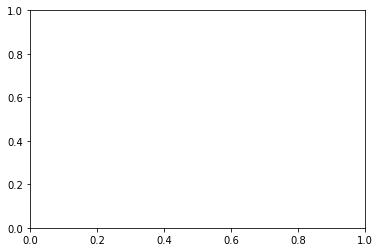

In [21]:
fig, ax = plt.subplots(1)
df['gen'] = generated
#df['net'] = dcnet
ax.plot(df['gen'].iloc[0:48], label='Energy (W)')
fig, ax = plt.subplots(1)
#df['gen'] = generated
ax.plot(df['GHI'].iloc[0:48], label='Energy (W)')
fig, ax = plt.subplots(1)
#df['gen'] = generated
ax.plot(df['net'], label='Energy (W)')
sns.despine()
sns.despine()

In [23]:
dcnet

array([], dtype=float64)

In [15]:
meta

{'City': '-',
 'Clearsky DHI Units': 'w/m2',
 'Clearsky DNI Units': 'w/m2',
 'Clearsky GHI Units': 'w/m2',
 'Cloud Type -1': nan,
 'Cloud Type 0': 'Clear',
 'Cloud Type 1': 'Probably Clear',
 'Cloud Type 10': 'Unknown',
 'Cloud Type 11': 'Dust',
 'Cloud Type 12': 'Smoke',
 'Cloud Type 2': 'Fog',
 'Cloud Type 3': 'Water',
 'Cloud Type 4': 'Super-Cooled Water',
 'Cloud Type 5': 'Mixed',
 'Cloud Type 6': 'Opaque Ice',
 'Cloud Type 7': 'Cirrus',
 'Cloud Type 8': 'Overlapping',
 'Cloud Type 9': 'Overshooting',
 'Country': '-',
 'DHI Units': 'w/m2',
 'DNI Units': 'w/m2',
 'Dew Point Units': 'c',
 'Elevation': 18,
 'Fill Flag 0': nan,
 'Fill Flag 1': 'Missing Image',
 'Fill Flag 2': 'Low Irradiance',
 'Fill Flag 3': 'Exceeds Clearsky',
 'Fill Flag 4': 'Missing CLoud Properties',
 'Fill Flag 5': 'Rayleigh Violation',
 'GHI Units': 'w/m2',
 'Latitude': 42.37,
 'Local Time Zone': -5,
 'Location ID': 1325726,
 'Longitude': -71.1,
 'Precipitable Water Units': 'mm',
 'Pressure Units': 'mbar',
 'Rel